In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection with B-spline and `1e-4` smooth penalty parameter

In [6]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, showProgress=False)

In [7]:
fMRIdet()

### Tuning the kappa parameters

In [8]:
kappas = np.arange(1.45, 2, step=0.1)
fMRIdet.TuningKappa(kappas)

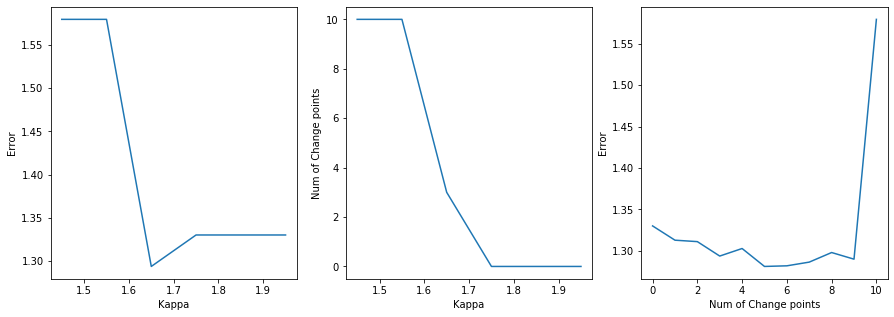

In [9]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [10]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.6500000000000001
The optimal number of change point under the range of kappa we speicified is: 3
The optimal number of change point is: 5


### Check the results after updating

In [11]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------+-------------------+------+
| Num of CPTs | Estiamted CPTs |        MSE        | Rank |
+-------------+----------------+-------------------+------+
|      3      | [33. 57. 97.]  | 1.293530390243997 |  6   |
+-------------+----------------+-------------------+------+


### Plot the detection results under the optimal kappa

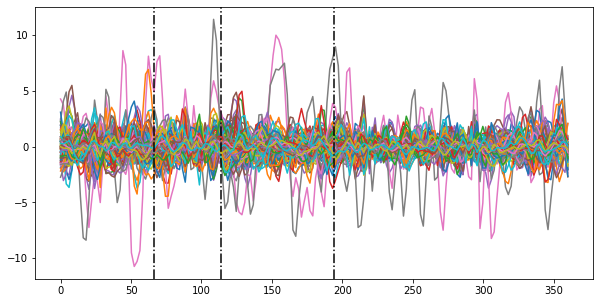

In [12]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa


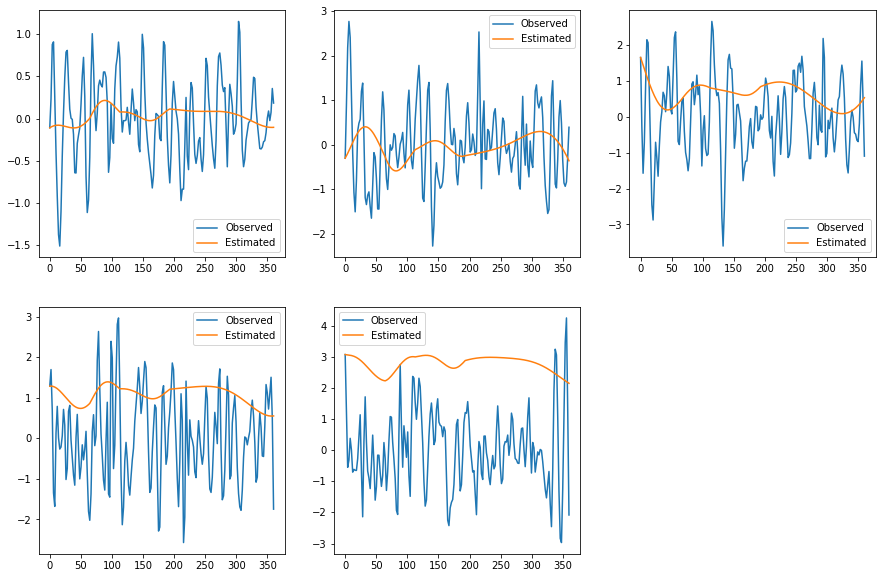

In [13]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

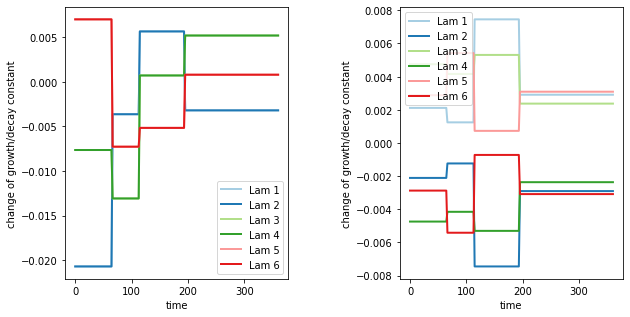

In [14]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 2. Detection with B-spline and `8e-5` smooth penalty parameter

In [15]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, showProgress=False)

In [16]:
fMRIdet()

### Tuning the kappa parameters

In [17]:
kappas = np.arange(1.45, 2, step=0.1)
fMRIdet.TuningKappa(kappas)

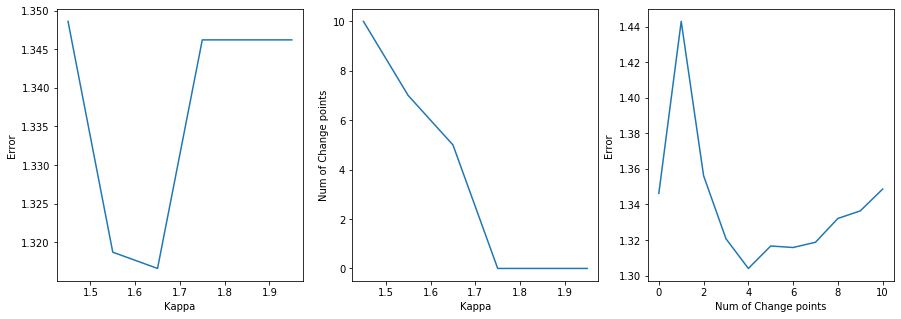

In [18]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [19]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.6500000000000001
The optimal number of change point under the range of kappa we speicified is: 5
The optimal number of change point is: 4


### Check the results after updating

In [20]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+----------------------------+--------------------+------+
| Num of CPTs |       Estiamted CPTs       |        MSE         | Rank |
+-------------+----------------------------+--------------------+------+
|      5      | [ 11.  29.  56.  85. 157.] | 1.3166149955079542 |  6   |
+-------------+----------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

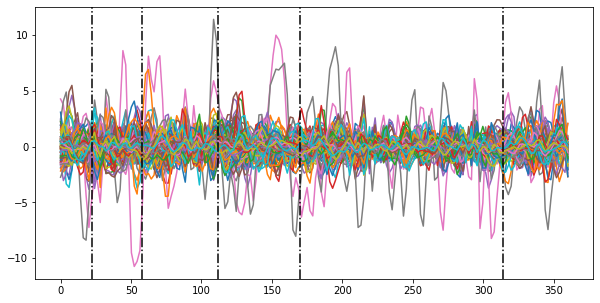

In [21]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

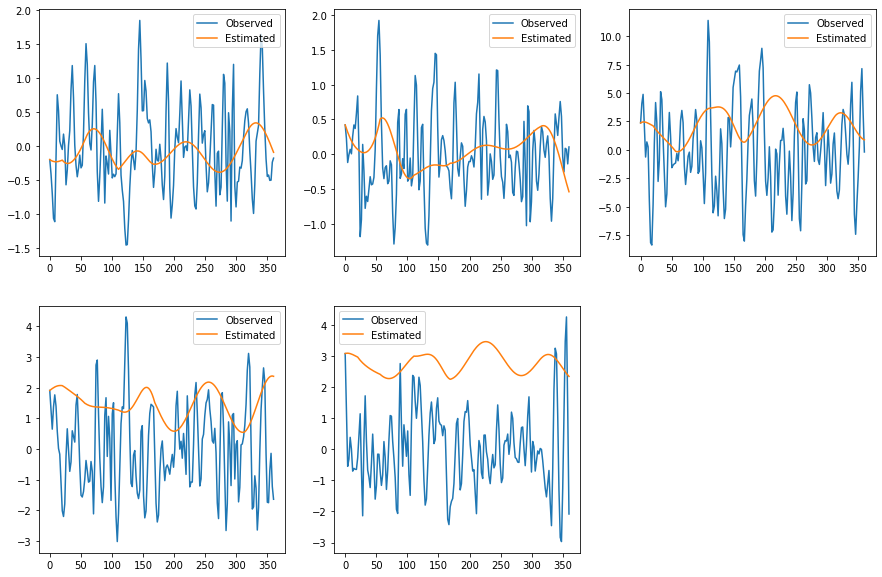

In [22]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

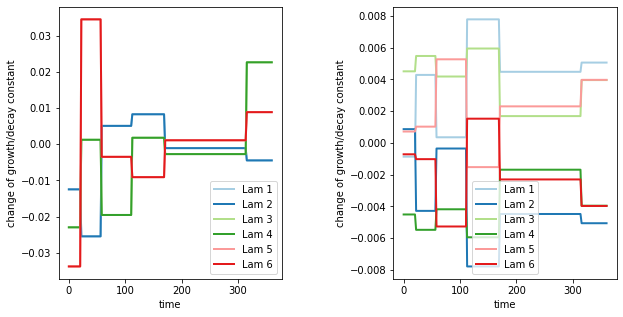

In [23]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 3. Detection with B-spline and `1e-6` smooth penalty parameter

In [24]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=1e-6, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5, showProgress=False)
fMRIdet()

In [25]:
kappas = np.arange(1., 3, step=0.01)
#kappas = [1.45, 1.55, 1.65, 1.75, 1.85, 1.95]
fMRIdet.TuningKappa(kappas)

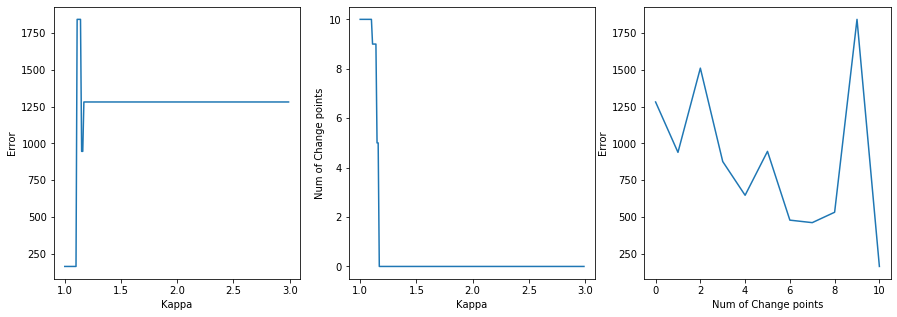

In [26]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [27]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 10


### Check the results after updating

In [28]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+-----------------------------------------------------+--------------------+------+
| Num of CPTs |                    Estiamted CPTs                   |        MSE         | Rank |
+-------------+-----------------------------------------------------+--------------------+------+
|      10     | [ 20.  49.  55.  94. 102. 121. 127. 133. 139. 145.] | 164.44852351211009 |  6   |
+-------------+-----------------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

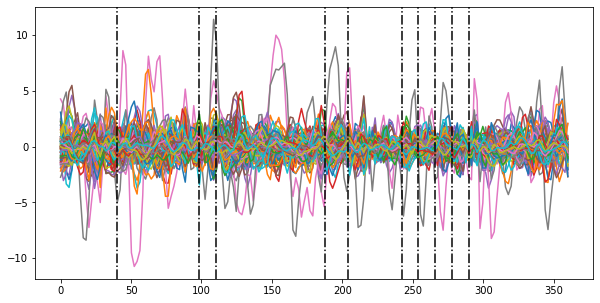

In [29]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

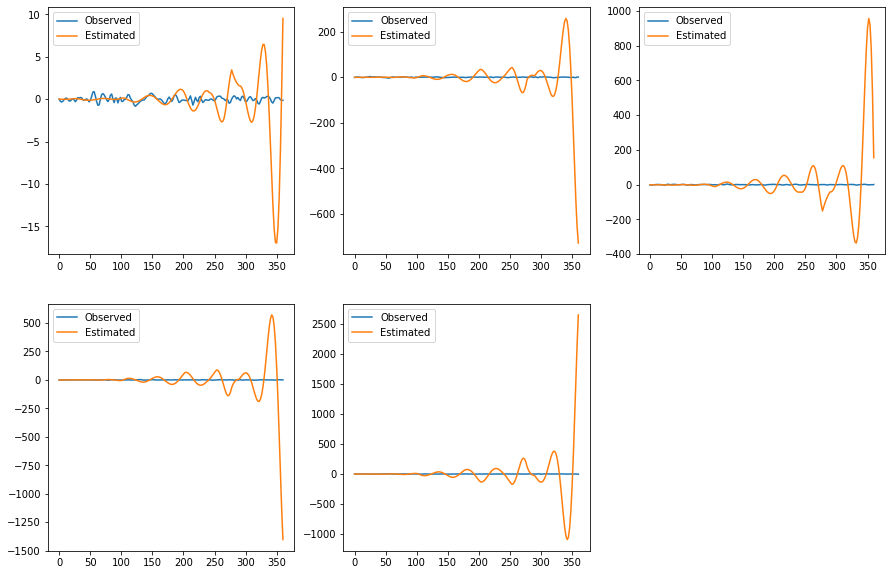

In [30]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

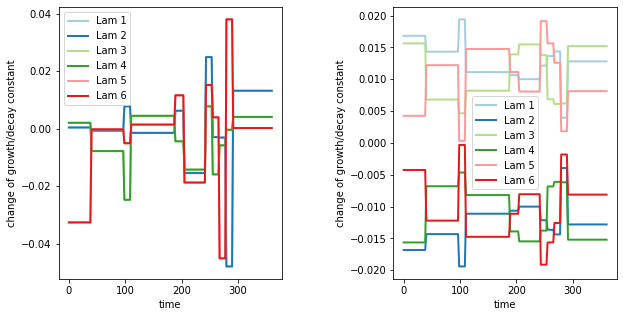

In [31]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 4. Detection with B-spline and `1e-4` smooth penalty parameter and half bandwith `h`

In [32]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False, 
                     r=6, kappa=1.65, fct=0.25, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [33]:
fMRIdet()

### Tuning the kappa parameters

In [34]:
kappas = np.arange(1.45, 2, step=0.1)
fMRIdet.TuningKappa(kappas)

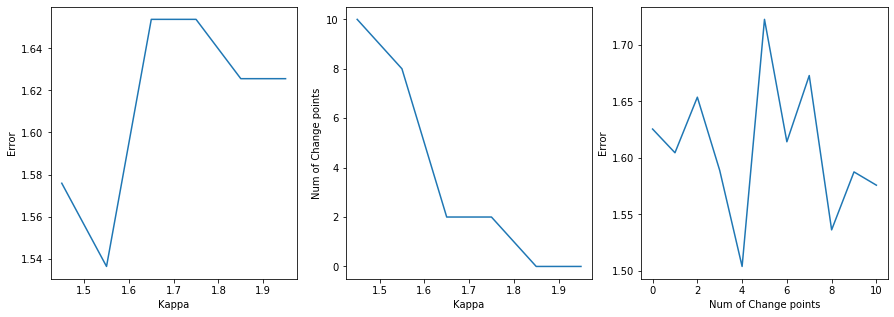

In [35]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [36]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.55
The optimal number of change point under the range of kappa we speicified is: 8
The optimal number of change point is: 4


### Check the results after updating

In [37]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+-------------------------------------------+--------------------+------+
| Num of CPTs |               Estiamted CPTs              |        MSE         | Rank |
+-------------+-------------------------------------------+--------------------+------+
|      8      | [ 20.  29.  48.  69. 107. 115. 139. 168.] | 1.5362958198659893 |  6   |
+-------------+-------------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

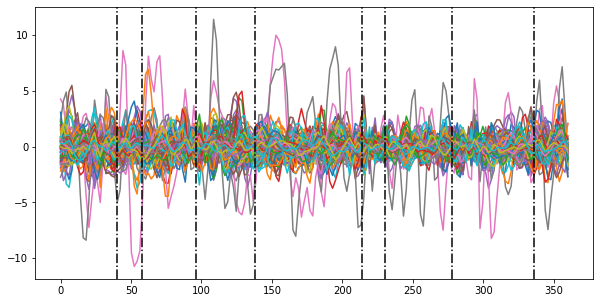

In [38]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

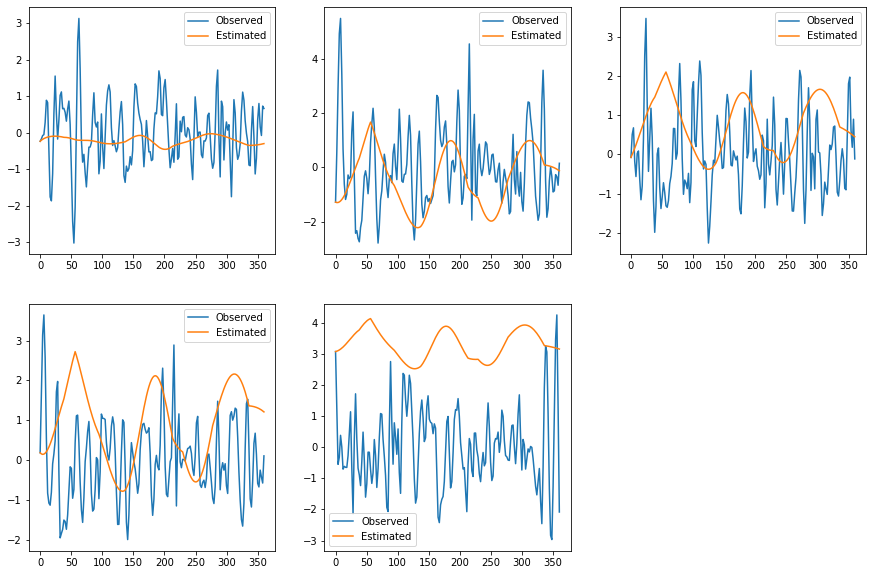

In [39]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

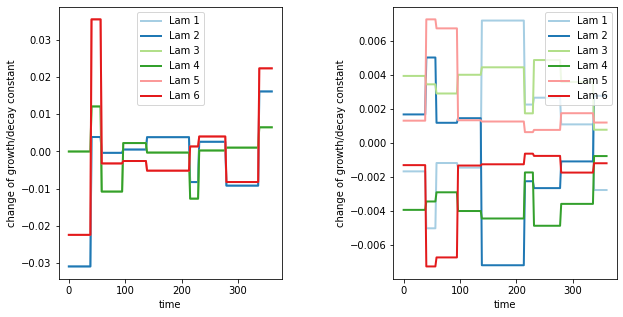

In [40]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 5. Detection with B-spline and `1e-4` smooth penalty parameter and double bandwith `h`

In [41]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False, 
                     r=6, kappa=1.65, fct=1, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [42]:
fMRIdet()

### Tuning the kappa parameters

In [43]:
kappas = np.arange(1.45, 2, step=0.01)
fMRIdet.TuningKappa(kappas)

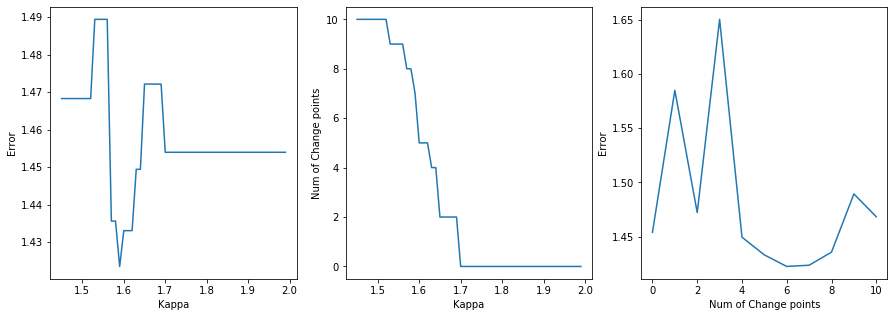

In [44]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [45]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.59
The optimal number of change point under the range of kappa we speicified is: 7
The optimal number of change point is: 6


### Check the results after updating

In [46]:
fMRIdet.UpdateEcpts()
print(fMRIdet)

+-------------+--------------------------------------+--------------------+------+
| Num of CPTs |            Estiamted CPTs            |        MSE         | Rank |
+-------------+--------------------------------------+--------------------+------+
|      7      | [ 13.  34.  55. 105. 122. 162. 169.] | 1.4235657100897958 |  6   |
+-------------+--------------------------------------+--------------------+------+


### Plot the detection results under the optimal kappa

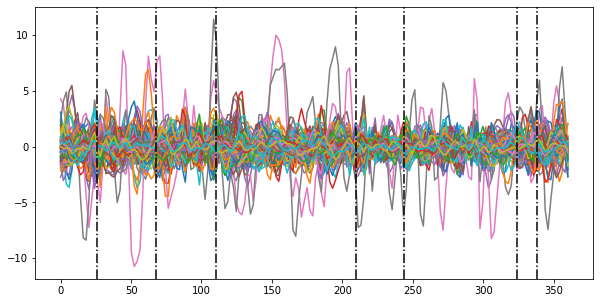

In [47]:
fMRIdet.PlotEcpts(saveFigPath=None)

### Plot the reconstructed curve under the optimal kappa

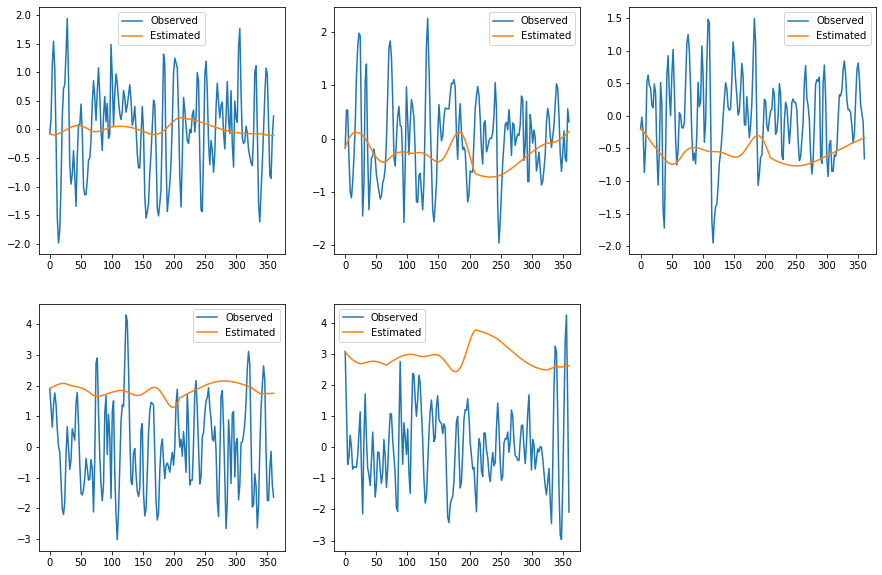

In [48]:
fMRIdet.PlotRecCurve(saveFigPath=None)

### Plot the eigenvalue curve under the optimal kappa

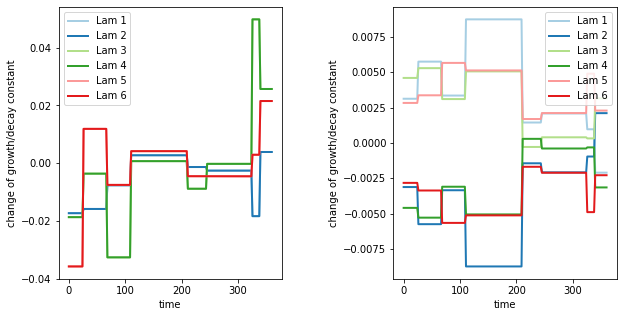

In [49]:
fMRIdet.PlotEigenCurve(saveFigPath=None)

## 6. Detection with no Spline smooth

In [50]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=False,
                     r=6, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

In [51]:
fMRIdetNoSpl._Preprocess()

In [52]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

### Calculate the derivative of X(t) with dx/dt. 

The last column is imputed by the mean of dXmat

In [53]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [54]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [55]:
fMRIdetNoSpl()

In [56]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

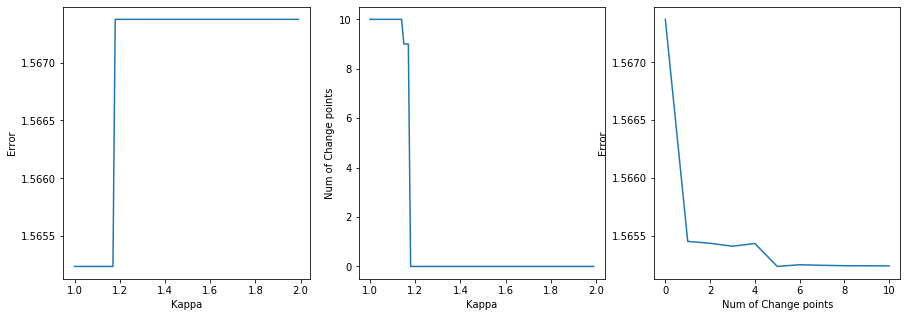

In [57]:
fMRIdetNoSpl.PlotKappaErrCurve()

In [58]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 5


In [59]:
fMRIdetNoSpl.UpdateEcpts()

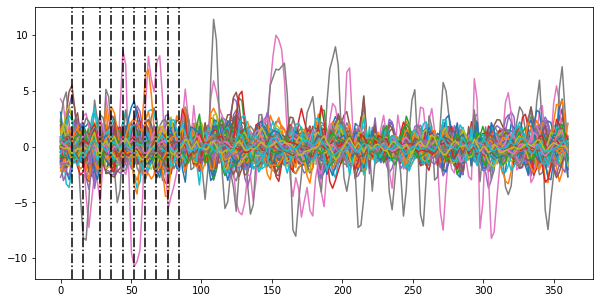

In [60]:
fMRIdetNoSpl.PlotEcpts()

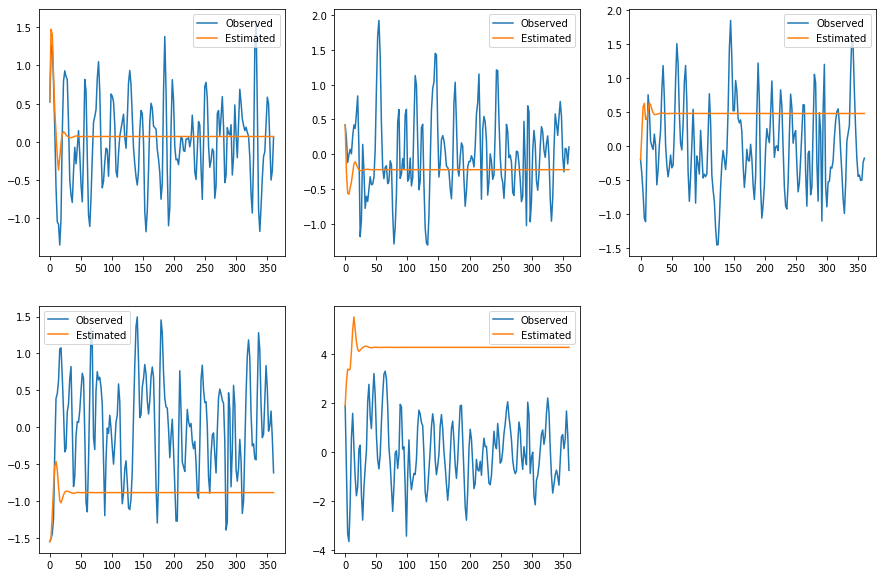

In [61]:
fMRIdetNoSpl.PlotRecCurve()

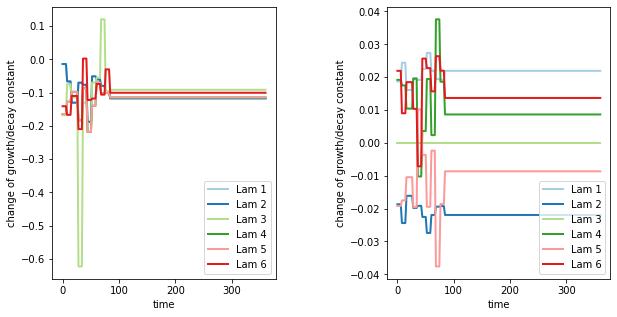

In [62]:
fMRIdetNoSpl.PlotEigenCurve()